In [1]:
!pip install -q -U google-generativeai

In [2]:
# Import Libraries
import os
import google.generativeai as genai
from IPython.display import Markdown

In [3]:
# Configure Gemini API
from google.colab import userdata
gemini_api_key = userdata.get('GeminiApi')
genai.configure(api_key = gemini_api_key)

**List Models**

There are two models available for us to use:


*   **gemini-pro:** optimized for text-only prompts
*   **gemini-pro-vision:** optimized for text and image prompts



In [4]:
# List Gemini Models
for mod in genai.list_models():

    if 'generateContent' in mod.supported_generation_methods:
        print(mod.name)

models/gemini-pro
models/gemini-pro-vision


**Generate text from text inputs**

In [5]:
# Load the model
model = genai.GenerativeModel('gemini-pro')

In [6]:
# Extract response
%%time
response = model.generate_content("What is physics-based AI?")
Markdown(response.text)

CPU times: user 179 ms, sys: 23.1 ms, total: 202 ms
Wall time: 13.1 s


Physics-based AI, also known as physically grounded AI or physics-informed AI, refers to artificial intelligence (AI) techniques that incorporate physical principles and laws into their models and algorithms. By leveraging physics-based knowledge, AI systems can reason and make decisions grounded in the real-world physical constraints and properties of the environment.

Key aspects of physics-based AI include:

1. **Physical Modeling:** Physics-based AI systems learn and incorporate fundamental physical principles, such as Newton's laws of motion, conservation laws, and material properties, into their models. This enables them to reason about physical interactions and predict outcomes based on known physical laws.

2. **Data-Driven Learning:** Physics-based AI systems combine physical models with data-driven learning techniques, such as deep learning or reinforcement learning. Data is used to learn parameters of the physical models and tune them to specific tasks or environments, enhancing the accuracy and effectiveness of the AI system.

3. **Real-World Generalization:** Physics-based AI systems are more likely to generalize well to new situations and environments that follow similar physical principles, even if they have not been explicitly trained on those scenarios. This is because the underlying physics guides the AI's reasoning and decision-making, making it more robust and adaptable.

4. **Interpretability and Explainability:** Physics-based AI models are often easier to interpret and explain than purely data-driven AI models. The underlying physics provides a foundation for understanding the model's predictions and decisions, making it more transparent and accountable.

Physics-based AI has applications in various fields, including:

1. **Robotics:** Physics-based AI enables robots to perform complex tasks that require understanding and interacting with the physical world, such as manipulation, navigation, and locomotion.

2. **Game Development:** Physics-based AI can be used to create realistic simulations and game environments that accurately model physical interactions, making games more immersive and engaging.

3. **Autonomous Systems:** Physics-based AI is essential for autonomous vehicles, drones, and other autonomous systems to operate safely and navigate complex environments.

4. **Scientific Discovery:** Physics-based AI can assist scientists in simulating and analyzing complex physical phenomena, accelerating scientific discoveries and understanding.

5. **Healthcare:** Physics-based AI can be used for medical simulations, drug discovery, and personalized treatment planning, taking into account individual patient-specific factors.

The field of physics-based AI is rapidly evolving, with new advances in modeling techniques, learning algorithms, and applications continually emerging. As AI systems become more sophisticated and interconnected with the physical world, physics-based AI is expected to play an increasingly significant role in shaping the future of AI and its impact on society.

**Customizing the Model Response**

You can customize your response using the generation_config argument. Here we are limiting the candidate count to 1 and setting max tokens and temperature.

In [7]:
response = model.generate_content(
    'What is physics-based AI?',
    generation_config=genai.types.GenerationConfig(
        candidate_count = 1,
        max_output_tokens = 300,
        temperature = 0.7)
)

generated_content = response.text
token_length = len(generated_content.split())
print("Token length:", token_length)

Markdown(response.text)

Token length: 225


Physics-based AI is an artificial intelligence approach inspired by the laws of physics. It enables AI systems to learn and reason about the physical world in a manner similar to how humans do. By incorporating physics principles into AI models, it becomes possible to generate more accurate and realistic simulations, predictions, and decisions in domains involving physical interactions, dynamics, and motion.

Key aspects of Physics-based AI:

1. **Incorporating Physics Principles:**
   Physics-based AI models leverage fundamental physics principles, such as Newton's laws of motion, conservation of energy, and fluid dynamics. These principles are embedded into the model's structure, allowing it to reason about physical phenomena and make predictions based on the laws of physics.

2. **Simulation and Prediction:**
   Physics-based AI excels in simulating and predicting the behavior of physical systems. It can simulate the motion of objects, the interactions between particles, the flow of fluids, and various other physical processes. These simulations are often used for tasks such as predicting the trajectory of a projectile, simulating the behavior of a robot in a dynamic environment, or forecasting the weather.

3. **Data-Driven Learning:**
   Physics-based AI models can be trained using data to improve their accuracy and performance. By incorporating data into the learning process, the model can adapt to specific scenarios and environments, making it more effective in handling real-world problems.

4. **Interpretability:**
   Physics-based AI models are

**Generate text from image and text inputs**

The gemini multimodal model, gemini-pro-vision, accepts both text and images as inputs and returns a text prompt.

In [8]:
# Import image file in colab
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Saving cotswold.jpg to cotswold.jpg


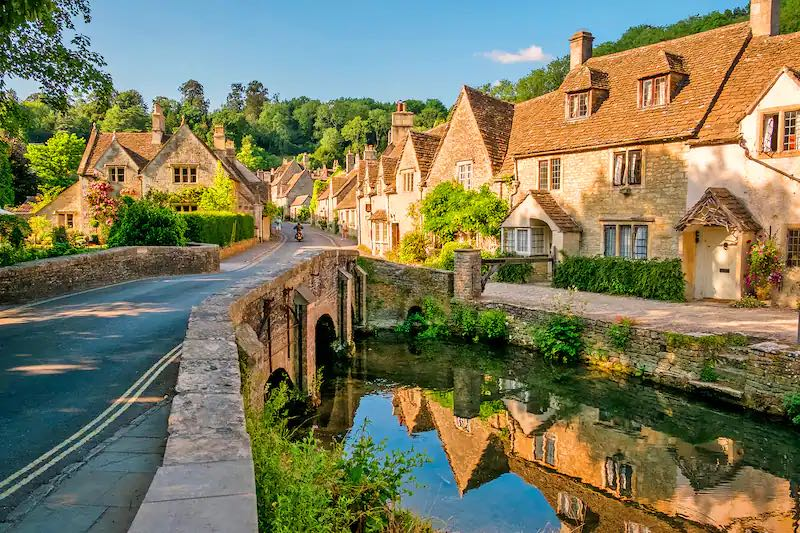

In [9]:
Image('cotswold.jpg', width=100)

In [11]:
import PIL.Image
img = PIL.Image.open('cotswold.jpg')

In [12]:
# Load gemini model
model = genai.GenerativeModel('gemini-pro-vision')

# Generate response
response = model.generate_content(img)
Markdown(response.text)

 The village of Castle Combe in England is a popular tourist destination due to its picturesque appearance.

Model execution with both text and image as inputs

In [14]:
# Extract response using image and text
response = model.generate_content(["Write a blog post using the image as reference.", img])

Markdown(response.text)

 The Cotswolds is an Area of Outstanding Natural Beauty in west-central England, known for its rolling hills, golden-hued stone villages, honey-colored cottages, and lush green countryside. It is a popular tourist destination, and it is easy to see why. The Cotswolds has something to offer everyone, from history buffs to nature lovers to foodies.

There are many charming villages to visit in the Cotswolds, each with its own unique character. Some of the most popular villages include Bibury, Bourton-on-the-Water, and Castle Combe. These villages are all well-preserved and offer a glimpse into traditional English life.

The Cotswolds is also home to a number of historical sites, including castles, abbeys, and churches. Some of the most popular historical sites include Warwick Castle, Blenheim Palace, and Lacock Abbey. These sites are all steeped in history and offer a fascinating glimpse into the past.

If you are a foodie, you will be in heaven in the Cotswolds. The region is home to a number of excellent restaurants, pubs, and cafes. You can sample traditional English dishes, such as fish and chips, bangers and mash, and shepherd's pie. Or, you can try some of the region's more modern cuisine.

The Cotswolds is a beautiful and charming region that is perfect for a vacation. Whether you are looking for a relaxing getaway or an action-packed adventure, you will find something to enjoy in the Cotswolds.